In [23]:
#!pip install PyQt5
#!pip install mplot3

import matplotlib
#import PyQt5
#matplotlib.use('Qt4Agg')
import pandas as pd
from IPython import embed
from matplotlib import colors
from matplotlib import pyplot as plt
from matplotlib import cm
from sklearn import datasets
import numpy as np
import tensorflow as tf
from sklearn.utils.fixes import logsumexp
import numpy as np
from sklearn.model_selection import train_test_split
from numpy import array
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

#%matplotlib notebook

# %matplotlib inline
# import mpld3
# mpld3.enable_notebook()


In [0]:
word = "haberman"
link = 'https://archive.ics.uci.edu/ml/machine-learning-databases/'+ word + '/'+ word + '.data'
df = pd.read_csv(link)
data = array(df)

In [0]:
def pca(X, dim):
  pca = PCA(n_components=dim)
  principalComponents = pca.fit_transform(X)
  principalDf = pd.DataFrame(data = principalComponents)
  return principalComponents

In [26]:
print(data)
print(data.shape)

[[30 62  3  1]
 [30 65  0  1]
 [31 59  2  1]
 ...
 [77 65  3  1]
 [78 65  1  2]
 [83 58  2  2]]
(305, 4)
[[30 62  3  1]
 [30 65  0  1]
 [31 59  2  1]
 ...
 [77 65  3  1]
 [78 65  1  2]
 [83 58  2  2]]
(305, 4)


In [27]:
X, y = data[:, :-1], data[:,-1]-1
print(X.shape);
print(y.shape);


(305, 3)
(305,)
(305, 3)
(305,)


In [0]:
def gaussian_fit(X,y):
  gnb = GaussianNB()
  gnb.fit(X, y)
  prob_pos_clf = gnb.predict_proba(X)[:, 1]
  y_expect = np.where(prob_pos_clf > 0.5, 1, 0)
  return y_expect
y_expect = gaussian_fit(X,y)


#Accuracy:

In [29]:
print(1-sum(abs(y-y_expect))/y.shape[0])

0.7442622950819673
0.7442622950819673


In [30]:
'''
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
             '''


"\nfrom sklearn.decomposition import PCA\npca = PCA(n_components=2)\nprincipalComponents = pca.fit_transform(X)\nprincipalDf = pd.DataFrame(data = principalComponents\n             , columns = ['principal component 1', 'principal component 2'])\n             "

"\nfrom sklearn.decomposition import PCA\npca = PCA(n_components=2)\nprincipalComponents = pca.fit_transform(X)\nprincipalDf = pd.DataFrame(data = principalComponents\n             , columns = ['principal component 1', 'principal component 2'])\n             "

In [0]:
x2d = pca(X,2)


In [0]:
size = X.shape[0]
y_colors = strs = ["" for x in range(size)] 
for i in range(size):
  if y_expect[i] == y[i] and y_expect[i] == 1:
    y_colors[i]="red"
  if y_expect[i] == y[i] and y_expect[i] == 0:
    y_colors[i]="blue"
  if y_expect[i] != y[i]:
    y_colors[i]="green"
    


 

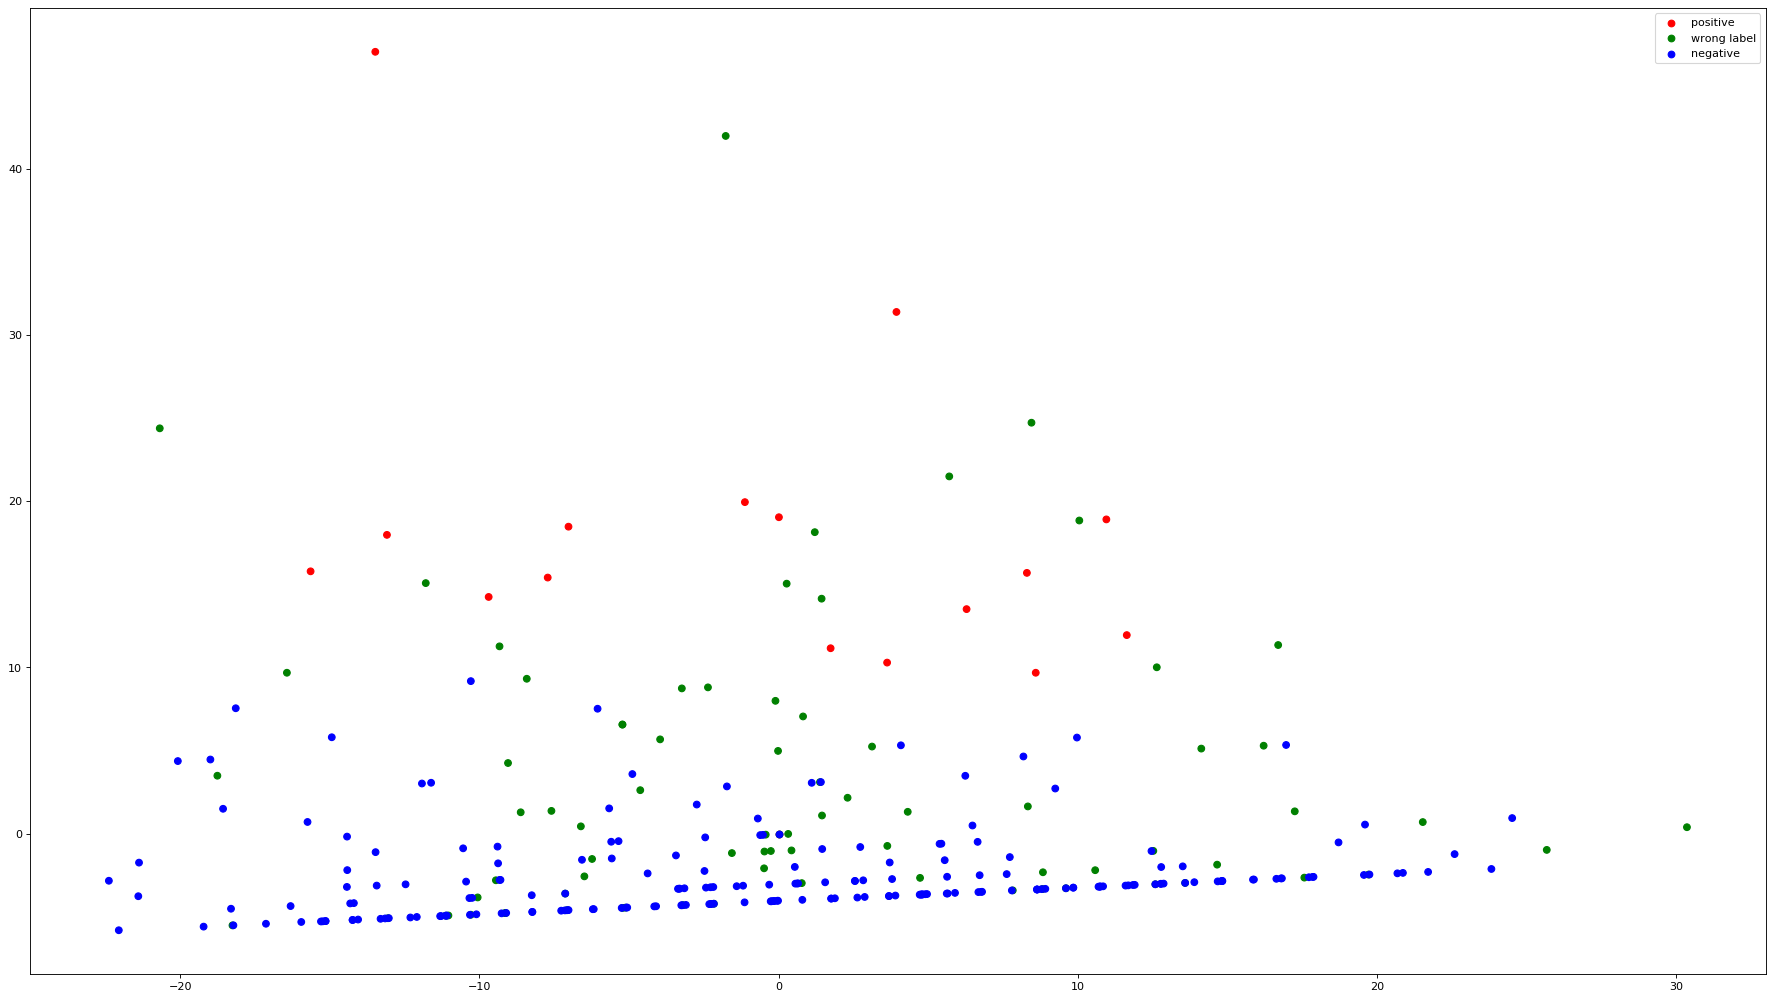

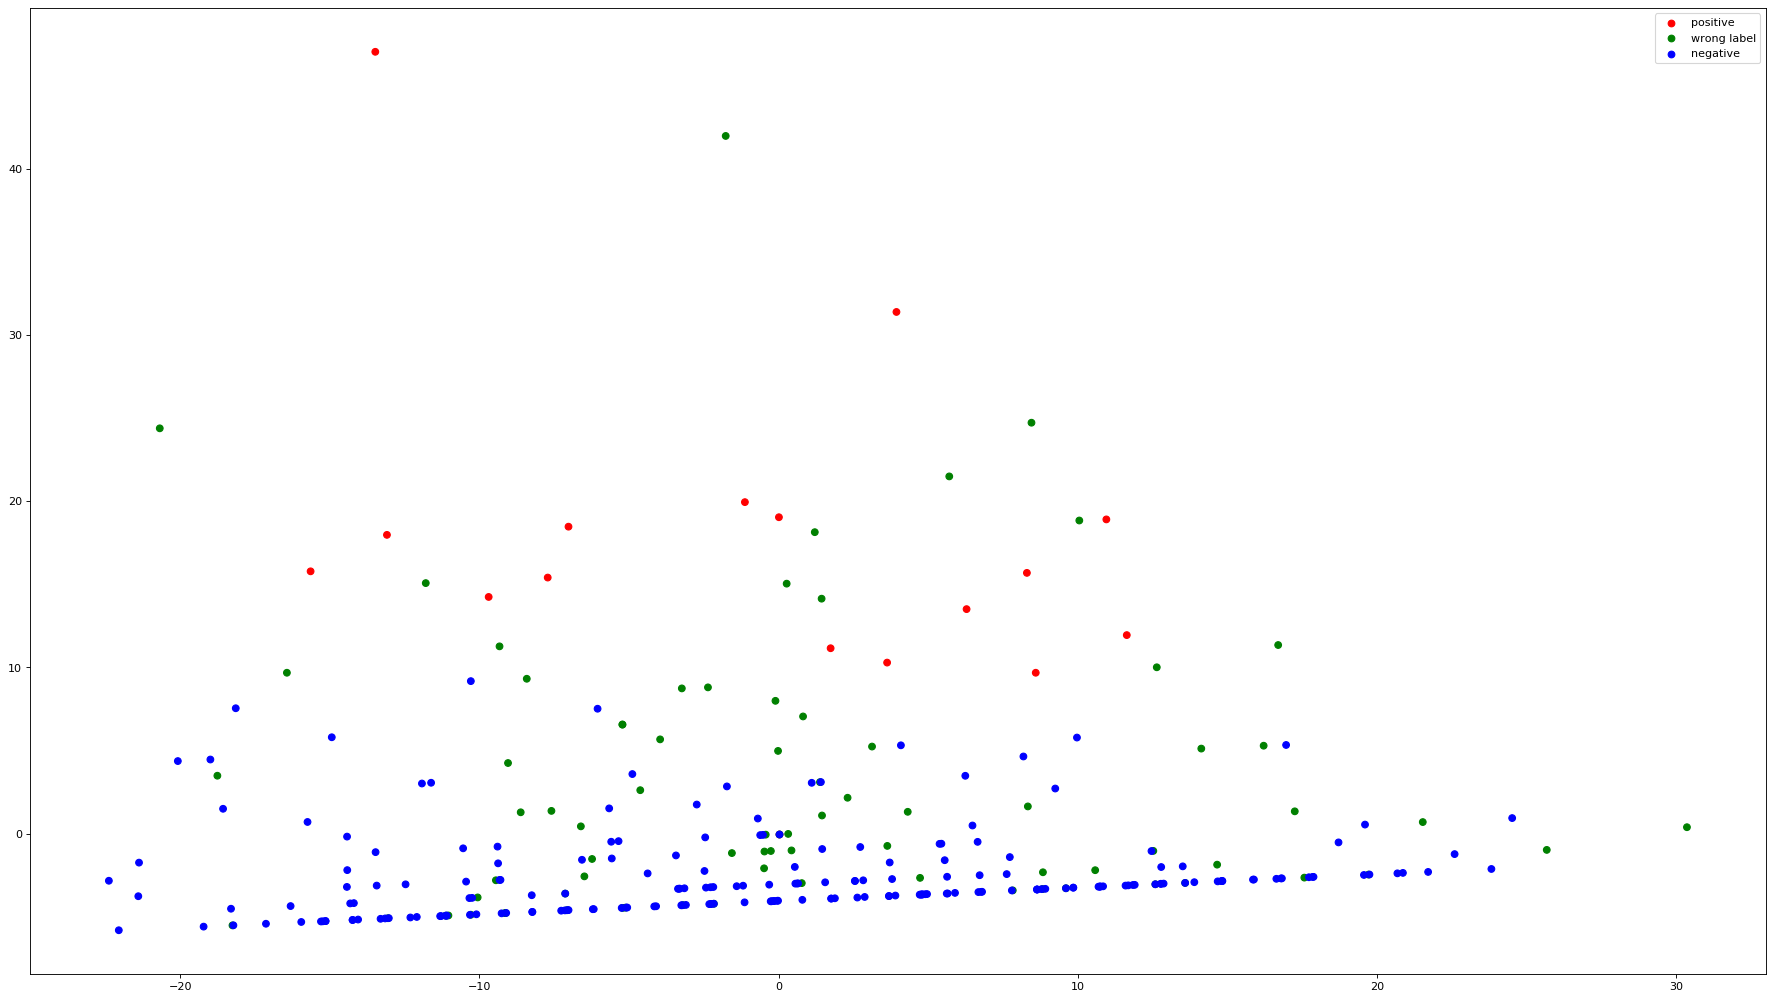

In [33]:
plt.figure(num=None, figsize=(28, 16), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(x2d[:,0],x2d[:,1],c=y_colors)
plt.scatter(0,0,c='red', label="positive")
plt.scatter(0,0,c='green', label="wrong label")
plt.scatter(0,0,c='blue', label="negative")
plt.legend()
plt.show()

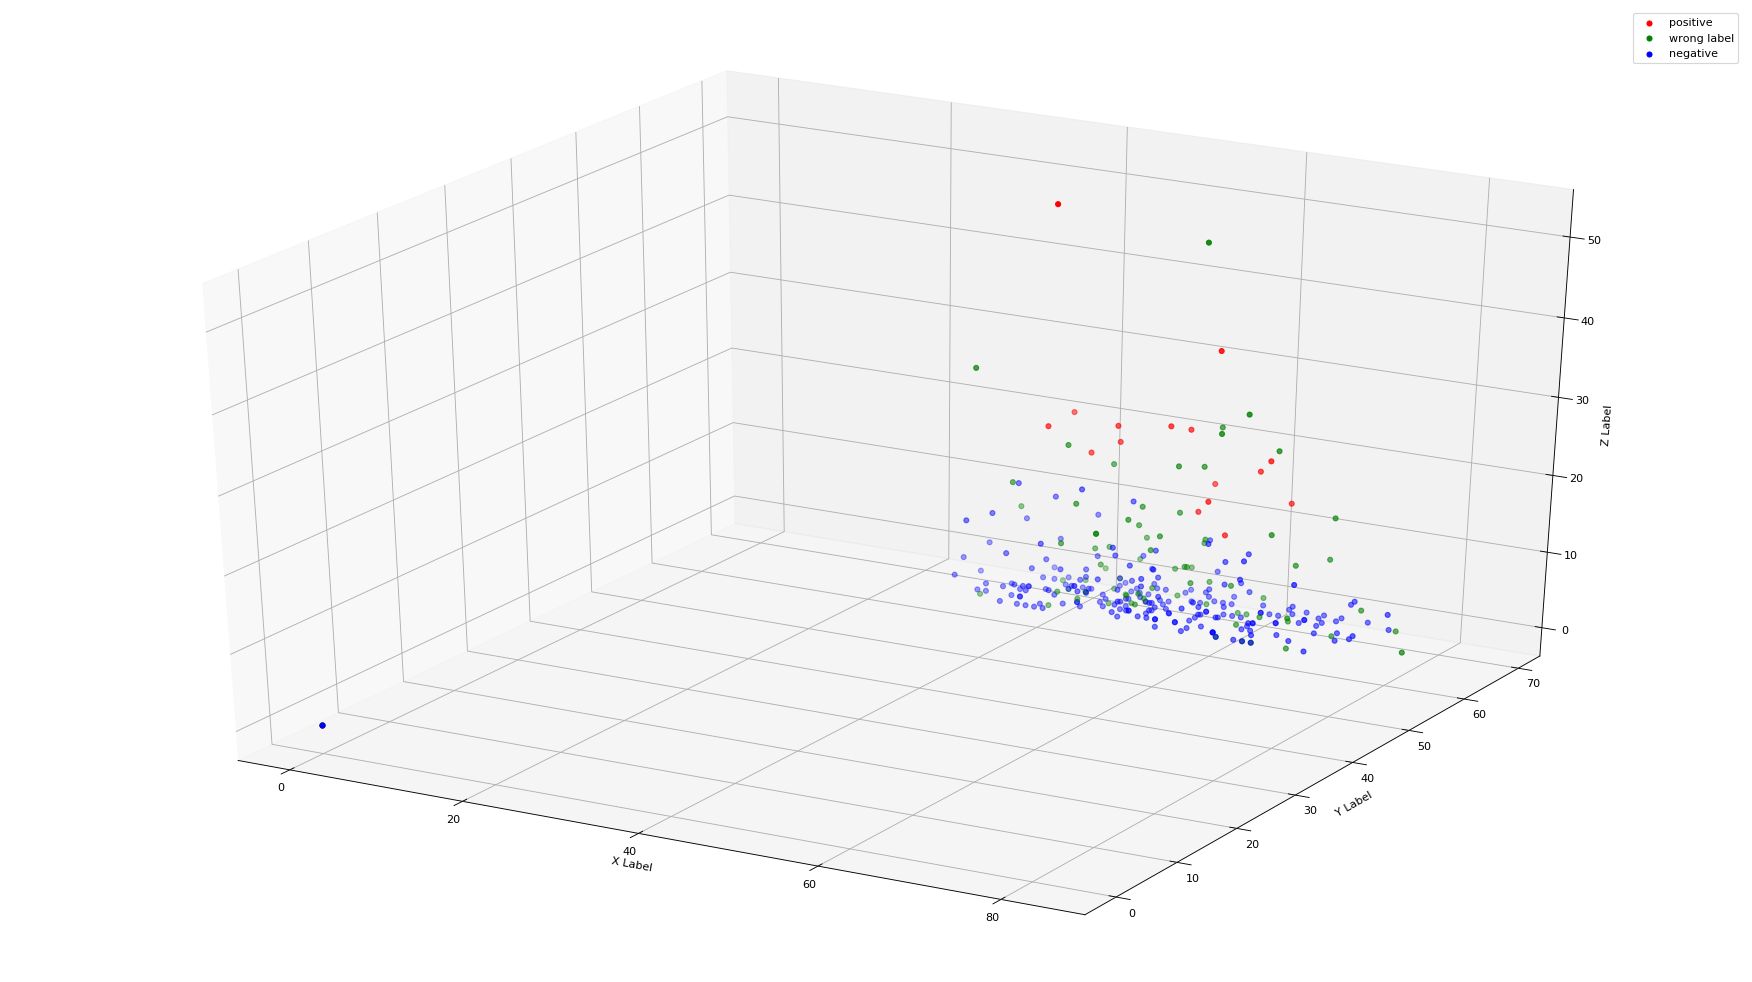

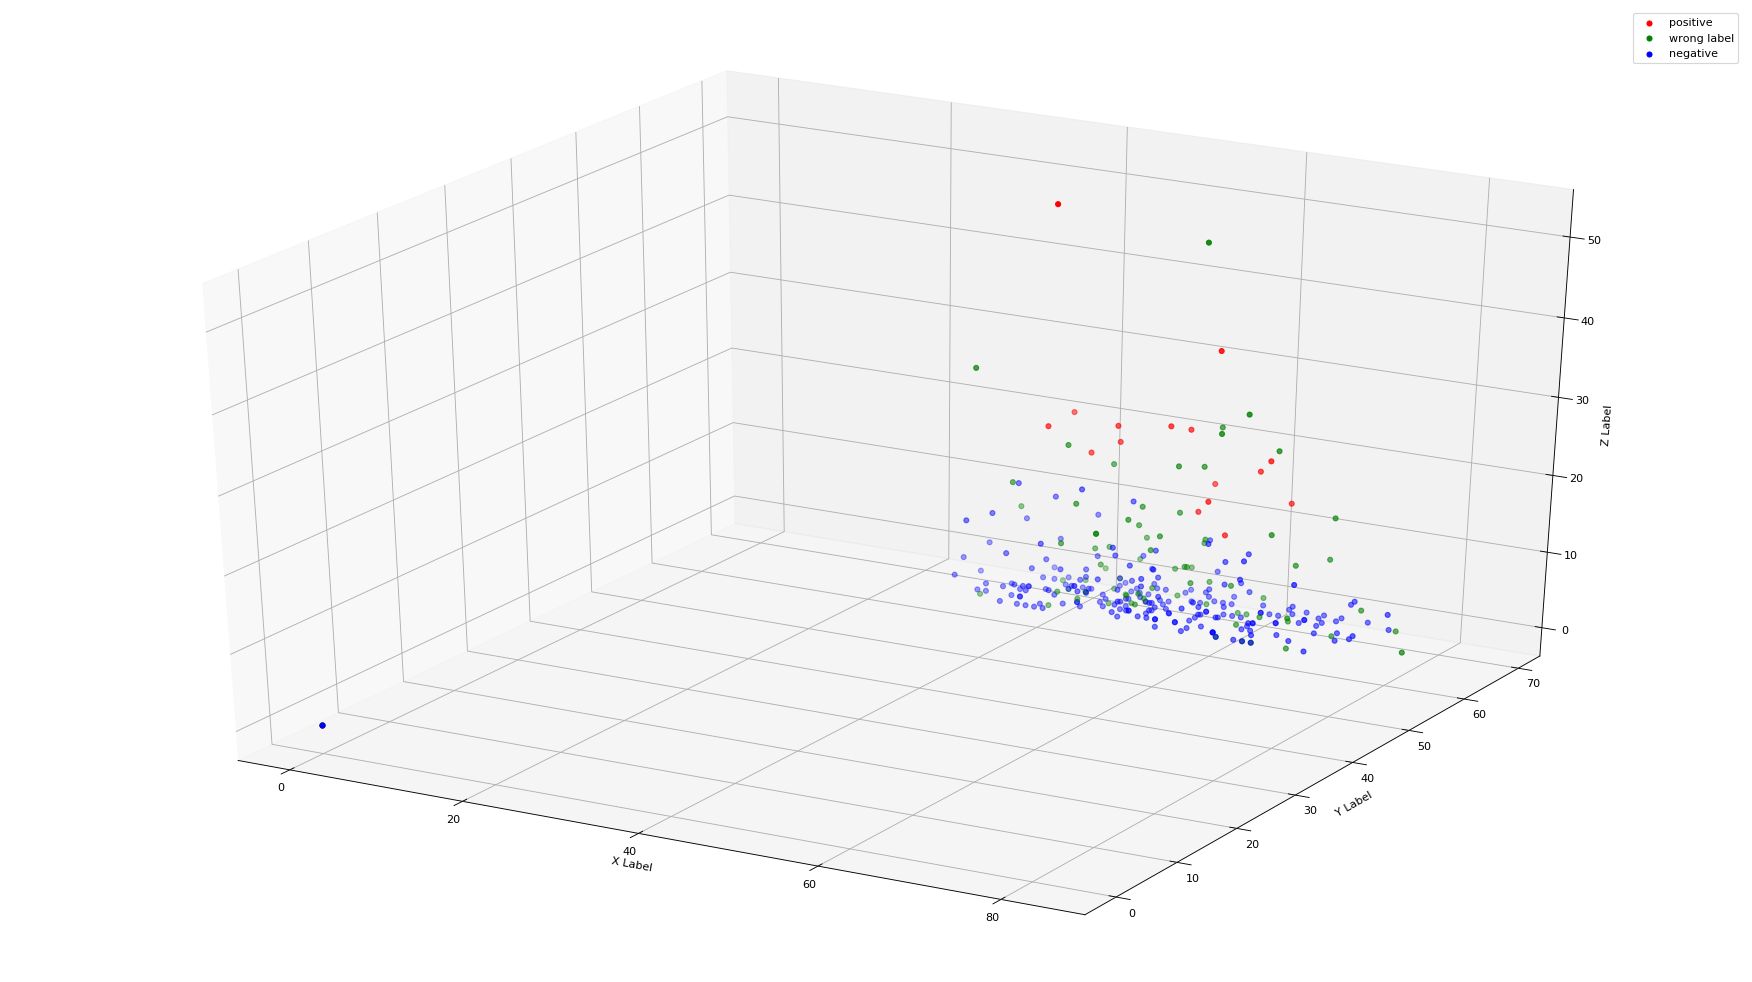

In [34]:

#X=pca(X,3)
fig = plt.figure(num=None, figsize=(28, 16), dpi=80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111, projection='3d')
n = X.shape[0]
ax.scatter(X[:,0],X[:,1],X[:,2],c=y_colors, marker='o')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

ax.scatter(0,0,0,c='r', label="positive")
ax.scatter(0,0,0,c='g', label="wrong label")
ax.scatter(0,0,0,c='b', label="negative")
ax.legend()

plt.show()

In [35]:
df2 = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt")
print(df2)

       3.6216    8.6661  -2.8073  -0.44699  0
0     4.54590   8.16740  -2.4586  -1.46210  0
1     3.86600  -2.63830   1.9242   0.10645  0
2     3.45660   9.52280  -4.0112  -3.59440  0
3     0.32924  -4.45520   4.5718  -0.98880  0
4     4.36840   9.67180  -3.9606  -3.16250  0
...       ...       ...      ...       ... ..
1366  0.40614   1.34920  -1.4501  -0.55949  1
1367 -1.38870  -4.87730   6.4774   0.34179  1
1368 -3.75030 -13.45860  17.5932  -2.77710  1
1369 -3.56370  -8.38270  12.3930  -1.28230  1
1370 -2.54190  -0.65804   2.6842   1.19520  1

[1371 rows x 5 columns]
       3.6216    8.6661  -2.8073  -0.44699  0
0     4.54590   8.16740  -2.4586  -1.46210  0
1     3.86600  -2.63830   1.9242   0.10645  0
2     3.45660   9.52280  -4.0112  -3.59440  0
3     0.32924  -4.45520   4.5718  -0.98880  0
4     4.36840   9.67180  -3.9606  -3.16250  0
...       ...       ...      ...       ... ..
1366  0.40614   1.34920  -1.4501  -0.55949  1
1367 -1.38870  -4.87730   6.4774   0.34179  1
1368 -3.7

In [0]:
data2=array(df2)
x2, y2 = data2[:, :-1], data2[:,-1]

In [37]:
print(x2.shape)
print(y2.shape)

(1371, 4)
(1371,)
(1371, 4)
(1371,)


In [0]:
y2_expect = gaussian_fit(x2,y2)

In [39]:
print(y2_expect)

[0 0 0 ... 1 1 1]
[0 0 0 ... 1 1 1]


#Accuracy

In [40]:
print(1-sum(abs(y2-y2_expect))/y2.shape[0])

0.8409919766593728
0.8409919766593728


In [0]:
x2d2 = pca(x2,2)

def getcolors(X,y,y_expect):
  size = X.shape[0]
  y_colors = strs = ["" for x in range(size)] 
  for i in range(size):
    if y_expect[i] == y[i] and y_expect[i] == 1:
      y_colors[i]="red"
    if y_expect[i] == y[i] and y_expect[i] == 0:
      y_colors[i]="blue"
    if y_expect[i] != y[i]:
      y_colors[i]="green"
  return y_colors

In [0]:
colors2=getcolors(x2,y2,y2_expect)

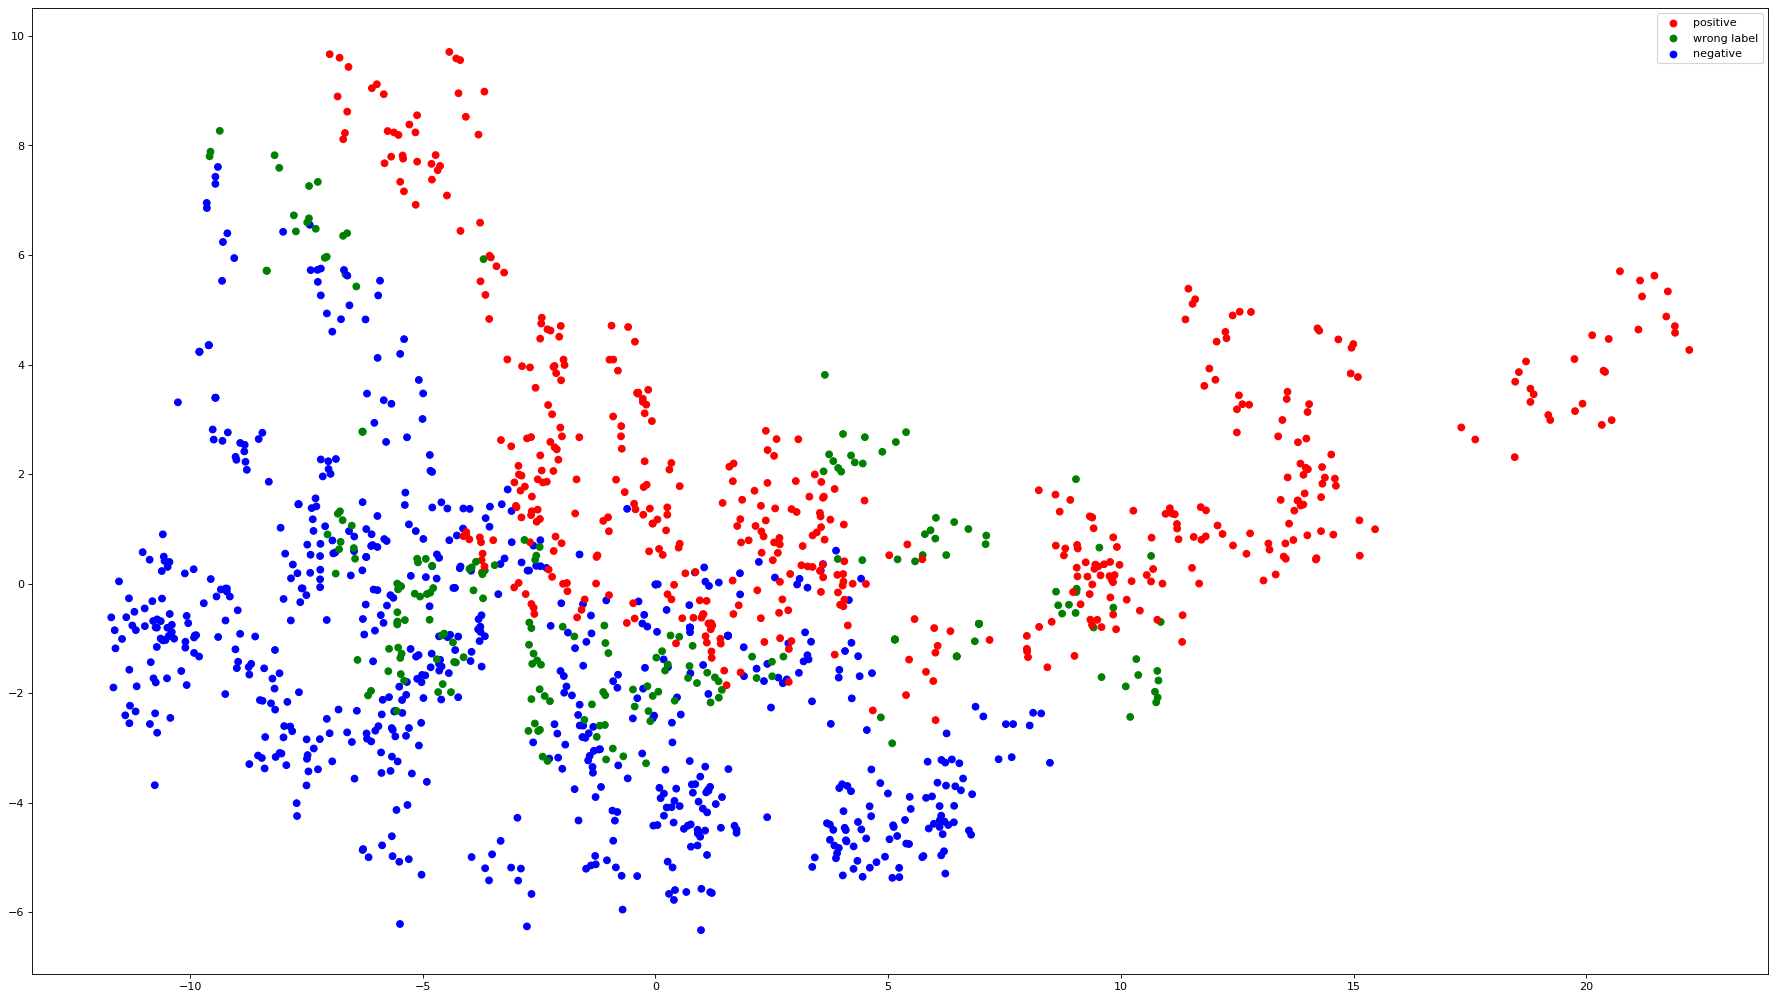

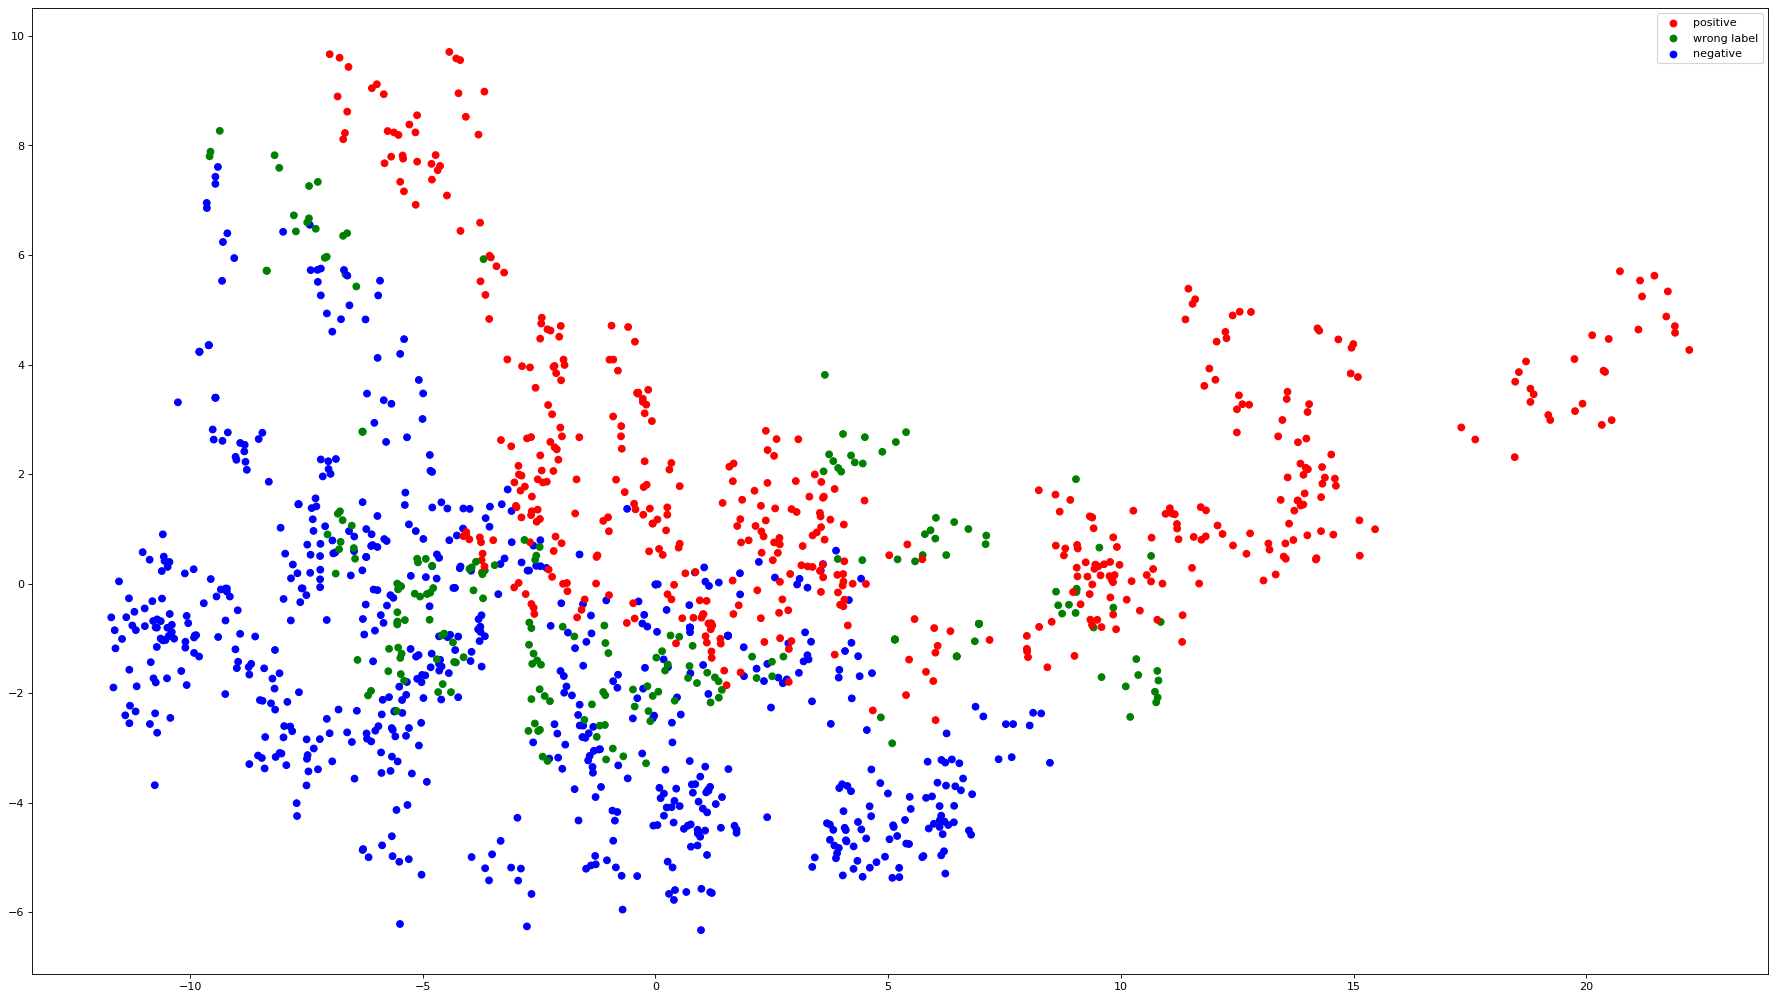

In [43]:
plt.figure(num=None, figsize=(28, 16), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(x2d2[:,0],x2d2[:,1],c=colors2)
plt.scatter(0,0,c='red', label="positive")
plt.scatter(0,0,c='green', label="wrong label")
plt.scatter(0,0,c='blue', label="negative")
plt.legend()
plt.show()

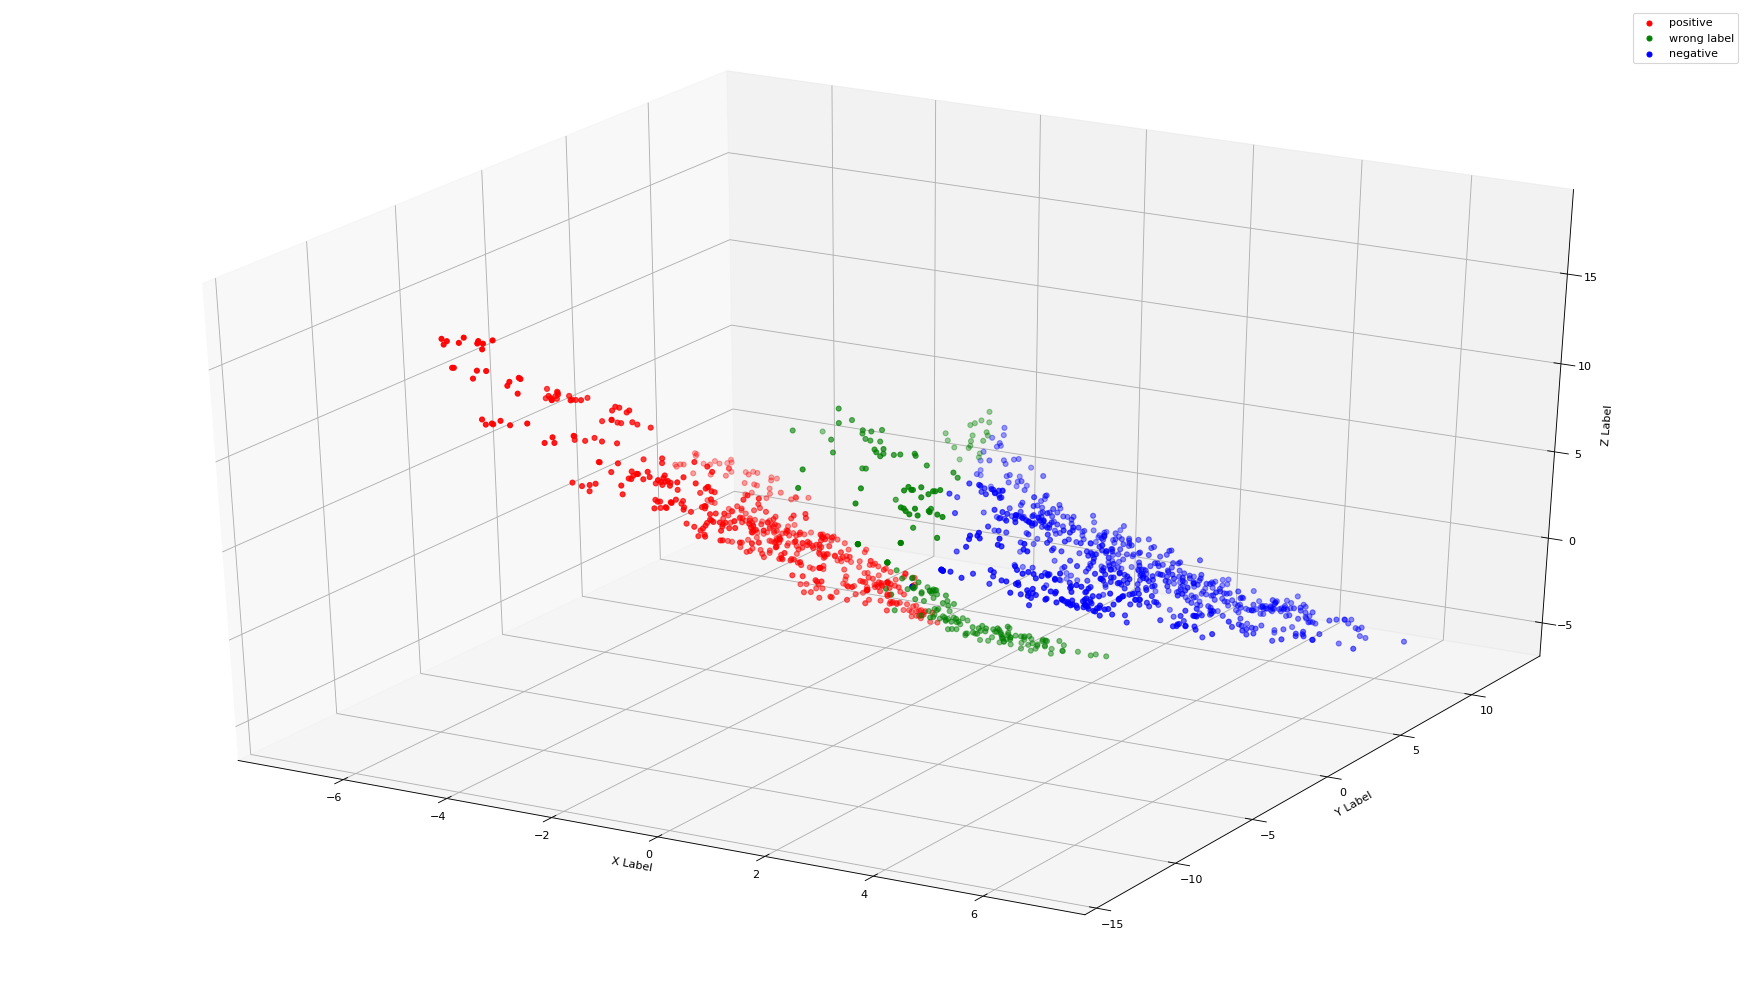

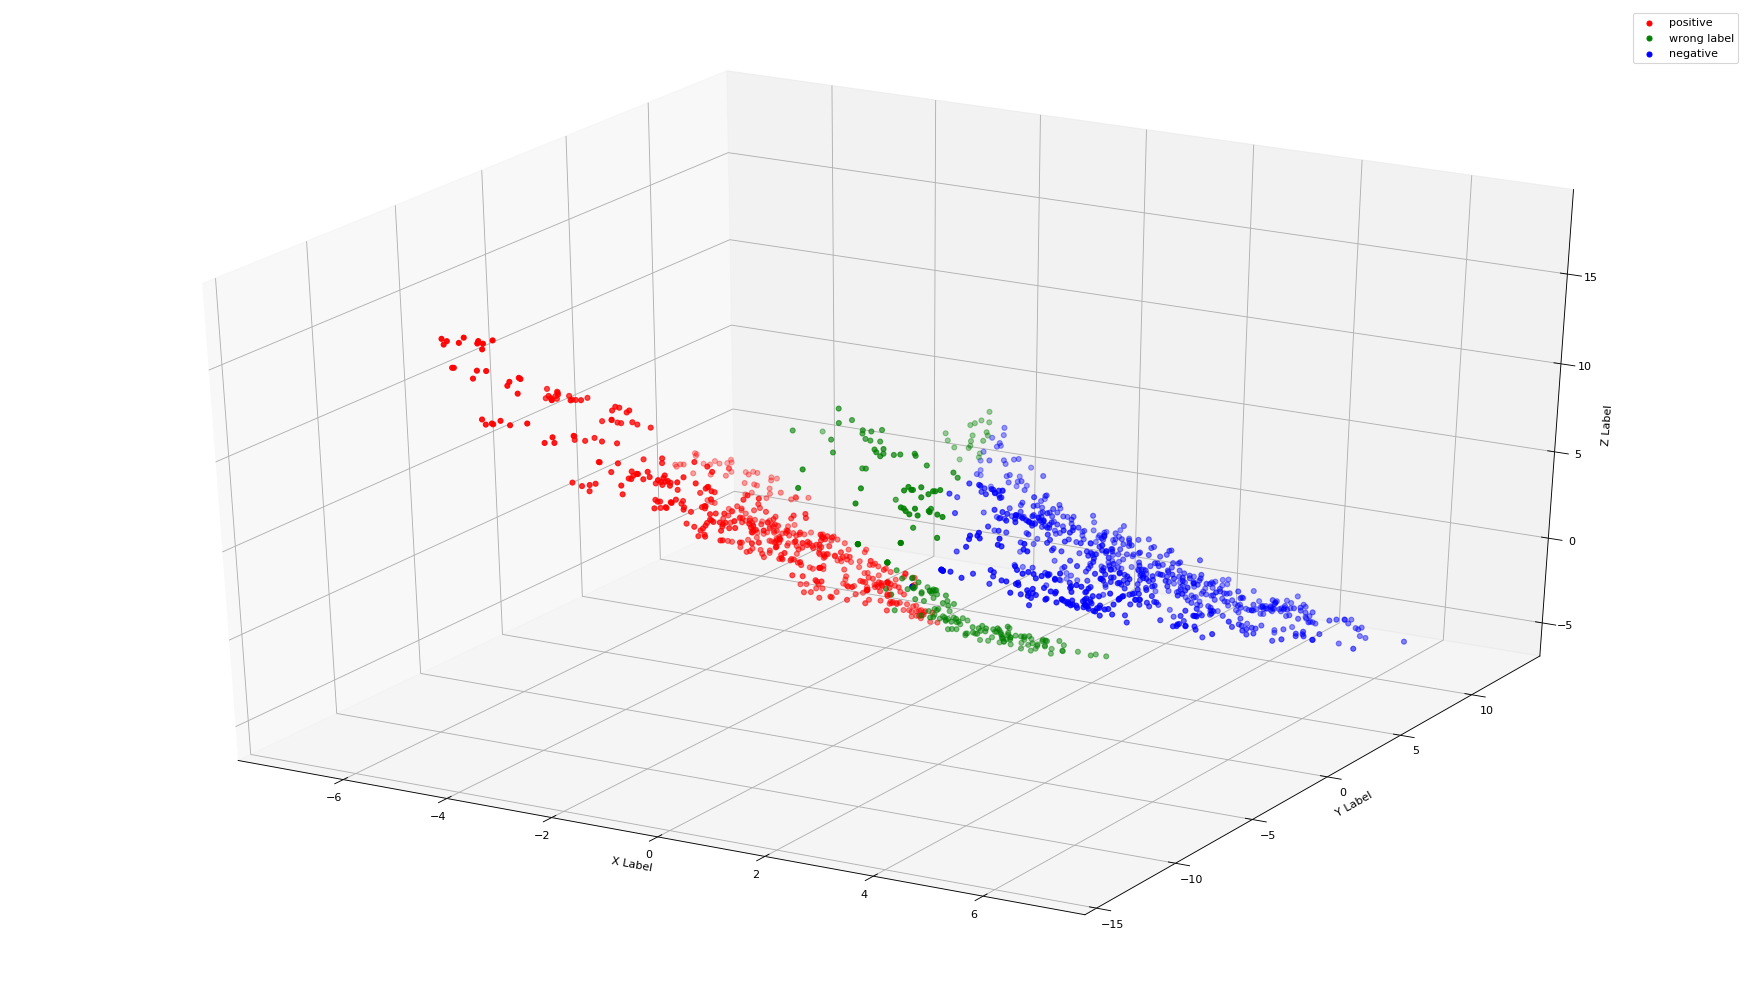

In [44]:
X=pca(X,3)
fig = plt.figure(num=None, figsize=(28, 16), dpi=80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111, projection='3d')
n = x2.shape[0]
ax.scatter(x2[:,0],x2[:,1],x2[:,2],c=colors2, marker='o')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

ax.scatter(0,0,0,c='r', label="positive")
ax.scatter(0,0,0,c='g', label="wrong label")
ax.scatter(0,0,0,c='b', label="negative")
ax.legend()

plt.show()
